<a href="https://colab.research.google.com/github/aruaru0/yolov8-test/blob/main/YOLOv8_segmentation_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv8のインストール

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 7.2 MB/s eta 0:00:00


# 学習（セグメンテーション）

## モデルの読み込み

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-seg.yaml').load('yolov8n.pt')  # build from YAML and transfer weights


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

## 学習




In [ ]:
results = model.train(data='coco128-seg.yaml', epochs=100, imgsz=640)

Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=coco128-seg.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimi

## 検証

In [ ]:
metrics = model.val()

Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs
val: Scanning /content/datasets/coco128-seg/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.33s/it]
                   all        128        929      0.882      0.809      0.874      0.726      0.791      0.665      0.688      0.381
                person        128        254      0.963      0.705      0.874      0.698      0.876      0.575      0.694      0.271
               bicycle        128          6      0.852        0.5      0.637      0.474      0.905        0.5      0.498        0.3
                   car        128         46      0.865      0.418      0.585       0.33      0.9

# 画像に重ねて表示させるコード

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

imgfile = "/content/datasets/coco128-seg/images/train2017/000000000605.jpg"
txtfile = "/content/datasets/coco128-seg/labels/train2017/000000000605.txt"

img = cv2.imread(imgfile)

In [ ]:
import numpy as np
cls = []
poly = []
w, h = img.shape[1], img.shape[0]
with open(txtfile, "r") as f :
  for line in f:
    x = list(map(float, line.split()))
    cls.append(int(x[0]))
    y = np.array(x[1:]).reshape(-1,2)
    y[:,0] = y[:,0] * w
    y[:,1] = y[:,1] * h
    poly.append(y)

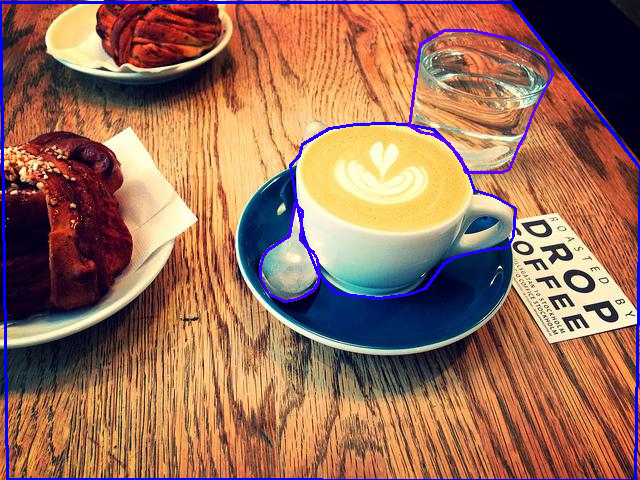

In [ ]:
for i, e in enumerate(poly) :
  pos = e.reshape((-1,1,2)).astype(np.int32)
  cv2.polylines(img, [pos], isClosed=True, color= (255, 0, 32*i), thickness=2)
  # cv2.fillPoly(img, [pos], color= (255, 0, 32*i))

cv2_imshow(img)

# 予測（セグメンテーション）

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!wget https://ultralytics.com/images/bus.jpg

--2023-10-18 00:25:10--  https://ultralytics.com/images/bus.jpg
Resolving ultralytics.com (ultralytics.com)... 75.2.70.75, 99.83.190.102
Connecting to ultralytics.com (ultralytics.com)|75.2.70.75|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ultralytics.com/images/bus.jpg [following]
--2023-10-18 00:25:10--  https://www.ultralytics.com/images/bus.jpg
Resolving www.ultralytics.com (www.ultralytics.com)... 13.54.180.169, 13.237.233.226, 13.55.79.22
Connecting to www.ultralytics.com (www.ultralytics.com)|13.54.180.169|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/bus.jpg [following]
--2023-10-18 00:25:11--  https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/bus.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting t

In [ ]:
model = YOLO('/content/runs/segment/train/weights/last.pt')
img = cv2.imread('./bus.jpg')
results = model(img, save=True, save_txt=True)


0: 640x480 4 persons, 1 bus, 30.0ms
Speed: 3.1ms preprocess, 30.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict
1 label saved to runs/segment/predict/labels


In [ ]:
# オブジェクトの種類を調べる
for e in results[0].boxes.cls.cpu():
  print(e, model.names[int(e)])

tensor(0.) person
tensor(0.) person
tensor(0.) person
tensor(5.) bus
tensor(0.) person


In [ ]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 5., 0.], device='cuda:0')
conf: tensor([0.9271, 0.8695, 0.8642, 0.6881, 0.4356], device='cuda:0')
data: tensor([[5.1167e+01, 4.0152e+02, 2.4198e+02, 9.0071e+02, 9.2712e-01, 0.0000e+00],
        [6.7119e+02, 3.8501e+02, 8.0967e+02, 8.7345e+02, 8.6953e-01, 0.0000e+00],
        [2.2043e+02, 4.0619e+02, 3.4347e+02, 8.5857e+02, 8.6419e-01, 0.0000e+00],
        [2.3209e+01, 2.2424e+02, 7.9936e+02, 7.6419e+02, 6.8810e-01, 5.0000e+00],
        [2.0721e-01, 5.5447e+02, 6.2028e+01, 8.7635e+02, 4.3564e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([5, 6])
xywh: tensor([[146.5747, 651.1158, 190.8146, 499.1942],
        [740.4321, 629.2301, 138.4774, 488.4395],
        [281.9528, 632.3799, 123.0360, 452.3810],
        [411.2843, 494.2178, 776.1509, 539.9485],
        [ 31.1177, 715.4116,  61.8210, 321.8752]], device='cuda:0')
xywhn: tensor([[0.1810, 0.6029, 0.23

In [ ]:
results[0].masks

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0.,

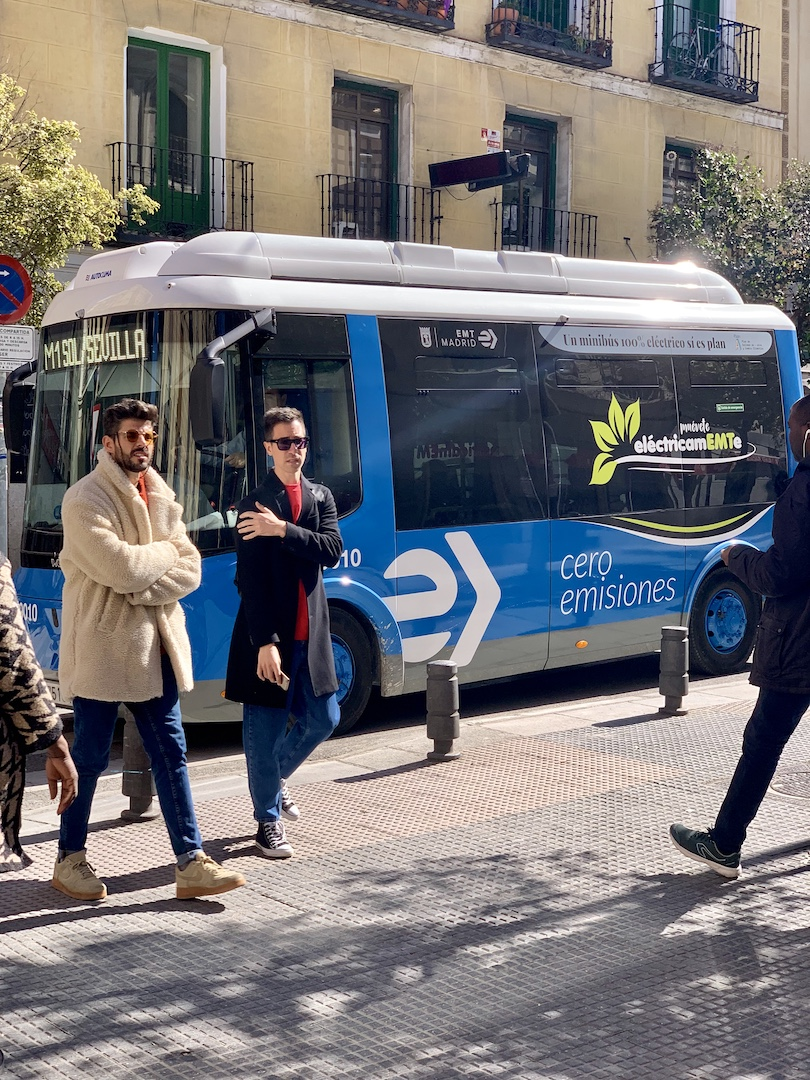

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
cv2_imshow(img)

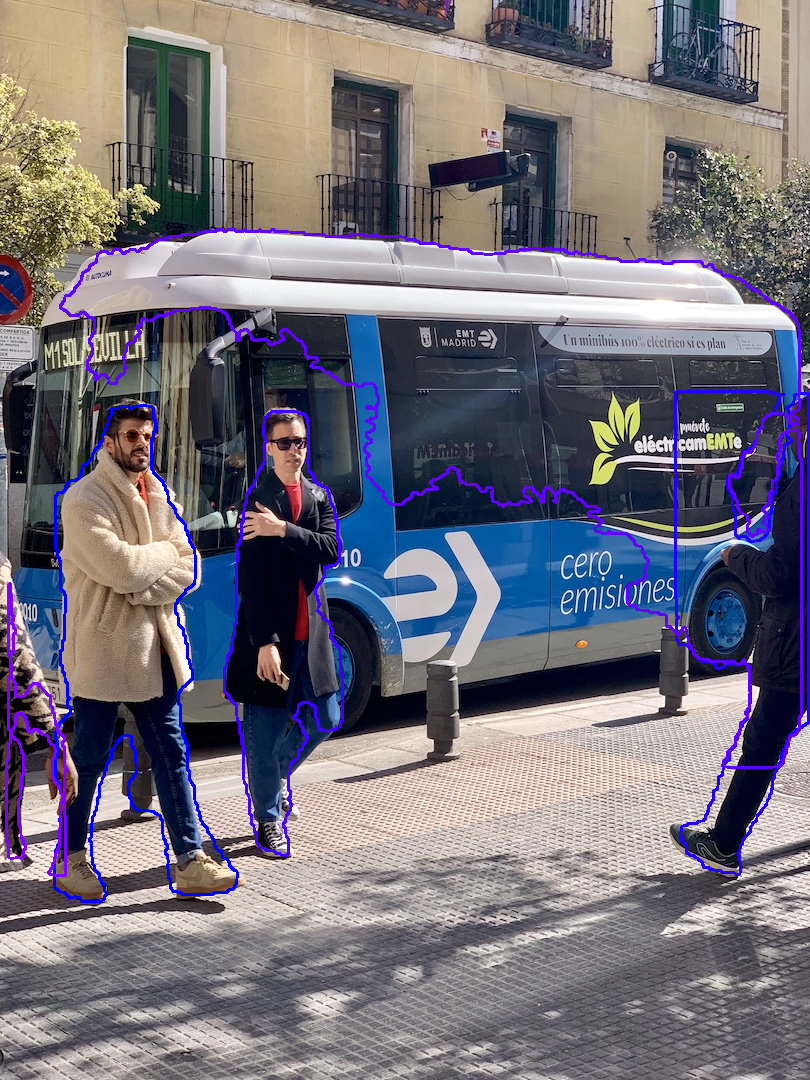

In [ ]:
for i, e in enumerate(results[0].masks.cpu().xy) :
  pos = e.reshape((-1,1,2)).astype(np.int32)
  cv2.polylines(img, [pos], isClosed=True, color= (255, 0, 32*i), thickness=2)
  # cv2.fillPoly(img, [pos], color= (255, 0, 32*i))

cv2_imshow(img)